In [15]:
import matplotlib.pyplot as plt
import numpy as np

from ipynb.fs.full.data_loader import load_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sys import maxsize

In [2]:
df = load_data()

In [3]:
df_filtered = df[
    df["starRating"].notna()
]

# Vectorizer

In [8]:
# TODO: should we move this into some EDA notebook for bodyText since it's technically not starRating specific?
# - No, we are running this EDA on a FILTERED subset of the data.

In [25]:
X = np.linspace(0, 50, 25 + 1, dtype=int)
Y = []

for min_df in X:
    vectorizer = CountVectorizer(stop_words=None, ngram_range=(1, 1), min_df=min_df)
    vectorizer.fit(df_filtered["bodyText"])
    
    num_features = len(vectorizer.vocabulary_)
    Y.append(num_features)
    
    display(f"Finished processing min_df = {min_df}")

'Finished processing min_df = 0'

'Finished processing min_df = 2'

'Finished processing min_df = 4'

'Finished processing min_df = 6'

'Finished processing min_df = 8'

'Finished processing min_df = 10'

'Finished processing min_df = 12'

'Finished processing min_df = 14'

'Finished processing min_df = 16'

'Finished processing min_df = 18'

'Finished processing min_df = 20'

'Finished processing min_df = 22'

'Finished processing min_df = 24'

'Finished processing min_df = 26'

'Finished processing min_df = 28'

'Finished processing min_df = 30'

'Finished processing min_df = 32'

'Finished processing min_df = 34'

'Finished processing min_df = 36'

'Finished processing min_df = 38'

'Finished processing min_df = 40'

'Finished processing min_df = 42'

'Finished processing min_df = 44'

'Finished processing min_df = 46'

'Finished processing min_df = 48'

'Finished processing min_df = 50'

Text(0.5,1,'StarRating - Unigrams')

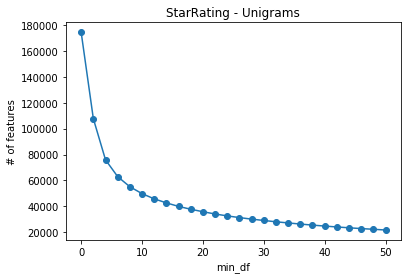

In [29]:
plt.plot(X, Y, "-o")

plt.xlabel("min_df")
plt.ylabel("# of features")
plt.title("StarRating - Unigrams")

In [31]:
X = list(range(1, 10)) + list(range(10, 50 + 1, 5))
Y = []

for min_df in X:
    vectorizer = CountVectorizer(stop_words=None, ngram_range=(1, 2), min_df=min_df)
    vectorizer.fit(df_filtered["bodyText"])
    
    num_features = len(vectorizer.vocabulary_)
    Y.append(num_features)
    
    display(f"Finished processing min_df = {min_df}")

'Finished processing min_df = 1'

'Finished processing min_df = 2'

'Finished processing min_df = 3'

'Finished processing min_df = 4'

'Finished processing min_df = 5'

'Finished processing min_df = 6'

'Finished processing min_df = 7'

'Finished processing min_df = 8'

'Finished processing min_df = 9'

'Finished processing min_df = 10'

'Finished processing min_df = 15'

'Finished processing min_df = 20'

'Finished processing min_df = 25'

'Finished processing min_df = 30'

'Finished processing min_df = 35'

'Finished processing min_df = 40'

'Finished processing min_df = 45'

'Finished processing min_df = 50'

In [55]:
display(Y[0])

5396608

Text(0.5,1,'StarRating - Unigrams and bigrams')

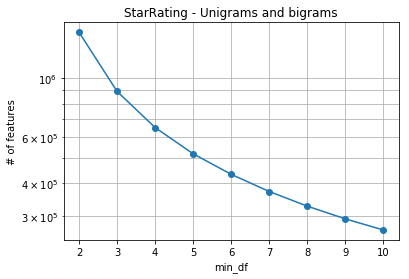

In [54]:
plt.plot(X[1:10], Y[1:10], "-o")

plt.yscale("log")
plt.grid(True, which="both")

plt.xlabel("min_df")
plt.ylabel("# of features")
plt.title("StarRating - Unigrams and bigrams")

Text(0.5,1,'StarRating - Unigrams and bigrams')

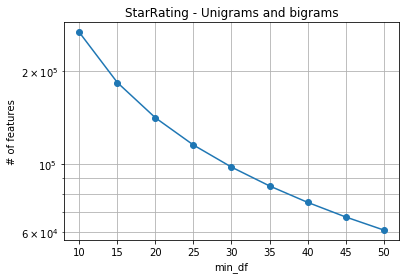

In [53]:
plt.plot(X[9:], Y[9:], "-o")

plt.yscale("log")
plt.grid(True, which="both")

plt.xlabel("min_df")
plt.ylabel("# of features")
plt.title("StarRating - Unigrams and bigrams")

# Cross-Validation

In [14]:
folds = []

kf = KFold(n_splits=5, shuffle=True, random_state=1731)
for train_indices, test_indices in kf.split(df_filtered):
    df_train = df_filtered.iloc[train_indices, :]
    df_test = df_filtered.iloc[test_indices, :]
    
    folds.append((df_train, df_test))

# Classification (5-class)

## Decision Tree

In [5]:
dt_accuracies = []

kf = KFold(n_splits=5, shuffle=True, random_state=1731)
for train_indices, test_indices in kf.split(df_filtered):
    df_train = df_filtered.iloc[train_indices, :]
    df_test = df_filtered.iloc[test_indices, :]
    
    vectorizer = CountVectorizer(stop_words=None, ngram_range=(1, 1), min_df=1)
    X_train = vectorizer.fit_transform(df_train["bodyText"])
    X_test = vectorizer.transform(df_test["bodyText"])
    
    y_train = df_train["starRating"].astype(int)
    y_test = df_test["starRating"].astype(int)
    
    classifier = DecisionTreeClassifier(criterion="gini", random_state=1731, class_weight=None)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    dt_accuracies.append(accuracy)

In [6]:
dt_accuracies

[0.4067702990609958,
 0.4045608774560088,
 0.3913352272727273,
 0.39504419191919193,
 0.39591224747474746]

In [10]:
nb_accuracies = []

kf = KFold(n_splits=5, shuffle=True, random_state=1731)
for train_indices, test_indices in kf.split(df_filtered):
    df_train = df_filtered.iloc[train_indices, :]
    df_test = df_filtered.iloc[test_indices, :]
    
    vectorizer = CountVectorizer(stop_words=None, ngram_range=(1, 1), min_df=1)
    X_train = vectorizer.fit_transform(df_train["bodyText"])
    X_test = vectorizer.transform(df_test["bodyText"])
    
    y_train = df_train["starRating"].astype(int)
    y_test = df_test["starRating"].astype(int)
    
    classifier = MultinomialNB(alpha=1.0, fit_prior=True)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    nb_accuracies.append(accuracy)

In [11]:
nb_accuracies

[0.4958573344906494,
 0.4981456640101002,
 0.49834280303030304,
 0.497238005050505,
 0.4954229797979798]

In [12]:
nb_uniform_accuracies = []

kf = KFold(n_splits=5, shuffle=True, random_state=1731)
for train_indices, test_indices in kf.split(df_filtered):
    df_train = df_filtered.iloc[train_indices, :]
    df_test = df_filtered.iloc[test_indices, :]
    
    vectorizer = CountVectorizer(stop_words=None, ngram_range=(1, 1), min_df=1)
    X_train = vectorizer.fit_transform(df_train["bodyText"])
    X_test = vectorizer.transform(df_test["bodyText"])
    
    y_train = df_train["starRating"].astype(int)
    y_test = df_test["starRating"].astype(int)
    
    classifier = MultinomialNB(alpha=1.0, fit_prior=False)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    nb_uniform_accuracies.append(accuracy)

In [13]:
nb_uniform_accuracies

[0.492069754596386,
 0.49341118914227095,
 0.4946338383838384,
 0.4932133838383838,
 0.4925031565656566]

In [ ]:
accuracies = []

kf = KFold(n_splits=5, shuffle=True, random_state=1731)
for train_indices, test_indices in kf.split(df_filtered):
    df_train = df_filtered.iloc[train_indices, :]
    df_test = df_filtered.iloc[test_indices, :]
    
    vectorizer = CountVectorizer(stop_words=None, ngram_range=(1, 1), min_df=1)
    X_train = vectorizer.fit_transform(df_train["bodyText"])
    X_test = vectorizer.transform(df_test["bodyText"])
    
    y_train = df_train["starRating"].astype(int)
    y_test = df_test["starRating"].astype(int)
    
    classifier = RandomForestClassifier(
        n_estimators=100, criterion="gini", n_jobs=-1, random_state=1731, verbose=maxsize, class_weight=None
    )
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

In [22]:
accuracies

[0.4997238222993766,
 0.4993292827270575,
 0.48903093434343436,
 0.5056029040404041,
 0.4895833333333333]

In [4]:
mlp_accuracies = []

kf = KFold(n_splits=5, shuffle=True, random_state=1731)
for train_indices, test_indices in kf.split(df_filtered):
    df_train = df_filtered.iloc[train_indices, :]
    df_test = df_filtered.iloc[test_indices, :]
    
    vectorizer = CountVectorizer(stop_words=None, ngram_range=(1, 1), min_df=1)
    X_train = vectorizer.fit_transform(df_train["bodyText"])
    X_test = vectorizer.transform(df_test["bodyText"])
    
    y_train = df_train["starRating"].astype(int)
    y_test = df_test["starRating"].astype(int)
    
    classifier = MLPClassifier(random_state=1731, verbose=True)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    mlp_accuracies.append(accuracy)

Iteration 1, loss = 1.08057698
Iteration 2, loss = 0.55313937
Iteration 3, loss = 0.27400285
Iteration 4, loss = 0.13132005
Iteration 5, loss = 0.06009351
Iteration 6, loss = 0.03443100
Iteration 7, loss = 0.02449263
Iteration 8, loss = 0.02498031
Iteration 9, loss = 0.02757077
Iteration 10, loss = 0.02541079
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.06117998
Iteration 2, loss = 0.56193173
Iteration 3, loss = 0.28279077
Iteration 4, loss = 0.12037070
Iteration 5, loss = 0.04991012
Iteration 6, loss = 0.02983878
Iteration 7, loss = 0.02346298
Iteration 8, loss = 0.02203106
Iteration 9, loss = 0.02347802
Iteration 10, loss = 0.02170192
Iteration 11, loss = 0.02545230
Iteration 12, loss = 0.03853238
Iteration 13, loss = 0.03648917
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.05590665
Iteration 2, loss = 0.54832545
Iteration 3, loss = 0.25931748
Iterati

In [5]:
mlp_accuracies

[0.5432020831689418,
 0.5455693206028565,
 0.5272253787878788,
 0.5403251262626263,
 0.5294349747474747]

In [ ]:
mlp_accuracies = []

kf = KFold(n_splits=5, shuffle=True, random_state=1731)
for train_indices, test_indices in kf.split(df_filtered):
    df_train = df_filtered.iloc[train_indices, :]
    df_test = df_filtered.iloc[test_indices, :]
    
    vectorizer = CountVectorizer(stop_words=None, ngram_range=(1, 3), min_df=1)
    X_train = vectorizer.fit_transform(df_train["bodyText"])
    X_test = vectorizer.transform(df_test["bodyText"])
    
    y_train = df_train["starRating"].astype(int)
    y_test = df_test["starRating"].astype(int)
    
    classifier = MLPClassifier(random_state=1731, verbose=True)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    mlp_accuracies.append(accuracy)

In [ ]:
mlp_accuracies = []

kf = KFold(n_splits=5, shuffle=True, random_state=1731)
for train_indices, test_indices in kf.split(df_filtered):
    df_train = df_filtered.iloc[train_indices, :]
    df_test = df_filtered.iloc[test_indices, :]
    
    vectorizer = TfidfVectorizer(stop_words=None, ngram_range=(1, 3), min_df=1)
    X_train = vectorizer.fit_transform(df_train["bodyText"])
    X_test = vectorizer.transform(df_test["bodyText"])
    
    y_train = df_train["starRating"].astype(int)
    y_test = df_test["starRating"].astype(int)
    
    classifier = MLPClassifier(random_state=1731, verbose=True)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    mlp_accuracies.append(accuracy)

# Classification (Binary)

In [66]:
df_binary = df[
    (df["starRating"] == 1.0)
    | (df["starRating"] == 5.0)
]

df_binary["starRating"].value_counts()

5.0    4315
1.0    1548
Name: starRating, dtype: int64

In [67]:
accuracies = []

kf = KFold(n_splits=5, shuffle=True, random_state=1731)
for train_indices, test_indices in kf.split(df_binary):
    df_train = df_binary.iloc[train_indices, :]
    df_test = df_binary.iloc[test_indices, :]
    
    vectorizer = CountVectorizer(stop_words=None, ngram_range=(1, 1), min_df=1)
    X_train = vectorizer.fit_transform(df_train["bodyText"])
    X_test = vectorizer.transform(df_test["bodyText"])
    
    y_train = df_train["starRating"].astype(int)
    y_test = df_test["starRating"].astype(int)
    
    classifier = DecisionTreeClassifier(criterion="gini", random_state=1731, class_weight=None)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

In [68]:
accuracies

[0.7962489343563512,
 0.7911338448422848,
 0.8107416879795396,
 0.8020477815699659,
 0.7841296928327645]

In [70]:
vectorizer = CountVectorizer(stop_words=None, ngram_range=(1, 1), min_df=1)
X = vectorizer.fit_transform(df_binary["bodyText"])
y = df_binary["starRating"].astype(int)

classifier = RandomForestClassifier(
    n_estimators=100, criterion="gini", n_jobs=-1, random_state=1731, verbose=maxsize, class_weight=None
)
classifier.fit(X, y)

building tree 1 of 100building tree 2 of 100building tree 3 of 100

building tree 4 of 100

building tree 5 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s

building tree 6 of 100[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s

building tree 7 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s

building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s

building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.2s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.2s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.3s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

[Parallel(n_jobs=-1)]: Done  98 out of 100 | elapsed:    3.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1731,
            verbose=9223372036854775807, warm_start=False)

In [71]:
feature_names = vectorizer.get_feature_names()

def get_feature_importances(classifier, feature_names):
    feature_importances = [
        (feature_names[index], importance)
        for index, importance in enumerate(classifier.feature_importances_)
    ]
    feature_importances.sort(key=lambda x: x[1], reverse=True)
    return feature_importances[:10]

get_feature_importances(classifier, feature_names)

[('and', 0.008674807534691046),
 ('of', 0.007535964982144459),
 ('music', 0.007309616391409887),
 ('the', 0.006785183041716058),
 ('comedy', 0.004095500122223632),
 ('movie', 0.0036275400927968217),
 ('from', 0.003601733375686404),
 ('script', 0.00355478353383468),
 ('with', 0.0031931272016649916),
 ('as', 0.003004370583938525)]

In [72]:
accuracies = []

kf = KFold(n_splits=5, shuffle=True, random_state=1731)
for train_indices, test_indices in kf.split(df_binary):
    df_train = df_binary.iloc[train_indices, :]
    df_test = df_binary.iloc[test_indices, :]
    
    vectorizer = CountVectorizer(stop_words="english", ngram_range=(1, 1), min_df=1)
    X_train = vectorizer.fit_transform(df_train["bodyText"])
    X_test = vectorizer.transform(df_test["bodyText"])
    
    y_train = df_train["starRating"].astype(int)
    y_test = df_test["starRating"].astype(int)
    
    classifier = DecisionTreeClassifier(criterion="gini", random_state=1731, class_weight=None)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

In [73]:
accuracies

[0.814151747655584,
 0.7911338448422848,
 0.8022165387894288,
 0.8080204778156996,
 0.8020477815699659]

In [74]:
accuracies = []

kf = KFold(n_splits=5, shuffle=True, random_state=1731)
for train_indices, test_indices in kf.split(df_binary):
    df_train = df_binary.iloc[train_indices, :]
    df_test = df_binary.iloc[test_indices, :]
    
    vectorizer = CountVectorizer(stop_words="english", ngram_range=(1, 1), min_df=1)
    X_train = vectorizer.fit_transform(df_train["bodyText"])
    X_test = vectorizer.transform(df_test["bodyText"])
    
    y_train = df_train["starRating"].astype(int)
    y_test = df_test["starRating"].astype(int)
    
    classifier = RandomForestClassifier(
        n_estimators=100, criterion="gini", n_jobs=-1, random_state=1731, verbose=maxsize, class_weight=None
    )
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s

building tree 6 of 100[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s

building tree 7 of 100
building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s

building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.1s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  89 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  91 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  93 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  94 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  95 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  96 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  97 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  98 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
building tree 1 of 100building tree 2 of 100
building tree 3 of 100building tree 4 o

building tree 96 of 100[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    2.2s

building tree 97 of 100[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    2.2s

building tree 98 of 100[Parallel(n_jobs=-1)]: Done  94 out of 100 | elapsed:    2.2s remaining:    0.1s

building tree 99 of 100[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    2.2s remaining:    0.1s

building tree 100 of 100[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:    2.3s remaining:    0.1s

[Parallel(n_jobs=-1)]: Done  97 out of 100 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  98 out of 100 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_job

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s

building tree 31 of 100[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.5s

building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.5s

building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.5s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.6s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.6s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.6s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.6s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.7s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37

building tree 1 of 100building tree 2 of 100building tree 3 of 100building tree 4 of 100



building tree 5 of 100
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
building tree 6 of 100
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
building tree 7 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s

building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s

building tree 9 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
building tree 10 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
building tree 11 of 100
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.2s
building tree 12 of 100
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
building tree 13 of 100
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
building tree 14 of 100
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s
building tree 15 of 100
building tree 16 of 100[Paral

[Parallel(n_jobs=-1)]: Done  97 out of 100 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  98 out of 100 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_job

building tree 30 of 100[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
building tree 31 of 100[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.5s


building tree 32 of 100[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s

building tree 33 of 100[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.5s

building tree 34 of 100[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.5s

building tree 35 of 100[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.5s

building tree 36 of 100[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.5s

building tree 37 of 100[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.6s

building tree 38 of 100[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s

building tree 39 of 100[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.6s

building tree 40 of 100[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.6s

building tree 41 of 100[Parallel(n_jobs=-1)]: Done  37

[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  59 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  61 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  62 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  63 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  65 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  67 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  69 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  70 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Do

In [75]:
accuracies

[0.8797953964194374,
 0.8627450980392157,
 0.886615515771526,
 0.8805460750853242,
 0.8779863481228669]

In [76]:
vectorizer = CountVectorizer(stop_words="english", ngram_range=(1, 1), min_df=1)
X = vectorizer.fit_transform(df_binary["bodyText"])
y = df_binary["starRating"].astype(int)

classifier = RandomForestClassifier(
    n_estimators=100, criterion="gini", n_jobs=-1, random_state=1731, verbose=maxsize, class_weight=None
)
classifier.fit(X, y)

building tree 1 of 100building tree 2 of 100building tree 3 of 100building tree 4 of 100



building tree 5 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s

building tree 6 of 100[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
building tree 7 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s


building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s

building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.4s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s

building tree 15 of 100[Parallel(n_jobs=-1)]: Done  1

building tree 100 of 100[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:    3.9s remaining:    0.2s

[Parallel(n_jobs=-1)]: Done  97 out of 100 | elapsed:    3.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  98 out of 100 | elapsed:    4.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1731,
            verbose=9223372036854775807, warm_start=False)

In [77]:
feature_names = vectorizer.get_feature_names()

def get_feature_importances(classifier, feature_names):
    feature_importances = [
        (feature_names[index], importance)
        for index, importance in enumerate(classifier.feature_importances_)
    ]
    feature_importances.sort(key=lambda x: x[1], reverse=True)
    return feature_importances[:10]

get_feature_importances(classifier, feature_names)

[('music', 0.008156962359485912),
 ('film', 0.005217165788653086),
 ('script', 0.003891840123250719),
 ('movie', 0.003847357274891625),
 ('orchestra', 0.0034559567896452776),
 ('comedy', 0.0034208581767929264),
 ('dull', 0.003315559781973615),
 ('boring', 0.0032684469626453154),
 ('years', 0.0032180429721561754),
 ('work', 0.0031271153300152133)]

# Classification (3-class)

# Regression